[Reference](https://towardsdev.com/how-to-improve-the-typesetting-of-your-multiple-visuals-in-python-13e2f8750dcf)

In [1]:
!pip install patchworklib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.4 MB/s eta 0:00:00


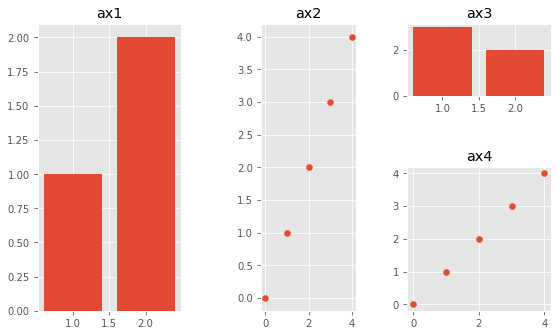

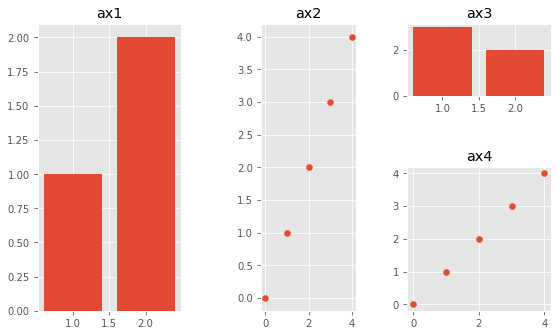

In [2]:
import patchworklib as pw
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#subplot 1
ax1 = pw.Brick(figsize=(1, 2))
ax1.bar([1, 2], [1, 2])
ax1.set_title("ax1")

#subplot 2
ax2 = pw.Brick(figsize=(1, 3))
ax2.scatter(range(5), range(5))
ax2.set_title("ax2")

#subplot 3
ax3 = pw.Brick(figsize=(2, 1))
ax3.bar([2, 1], [2, 3])
ax3.set_title("ax3")

#subplot 4
ax4 = pw.Brick(figsize=(2, 2))
ax4.scatter(range(5), range(5))
ax4.set_title("ax4")

#combine
ax1234 = (ax1 | ax2) | (ax3 / ax4)   # Use |, / to arrange plots
ax1234.savefig()  # like plt.show()

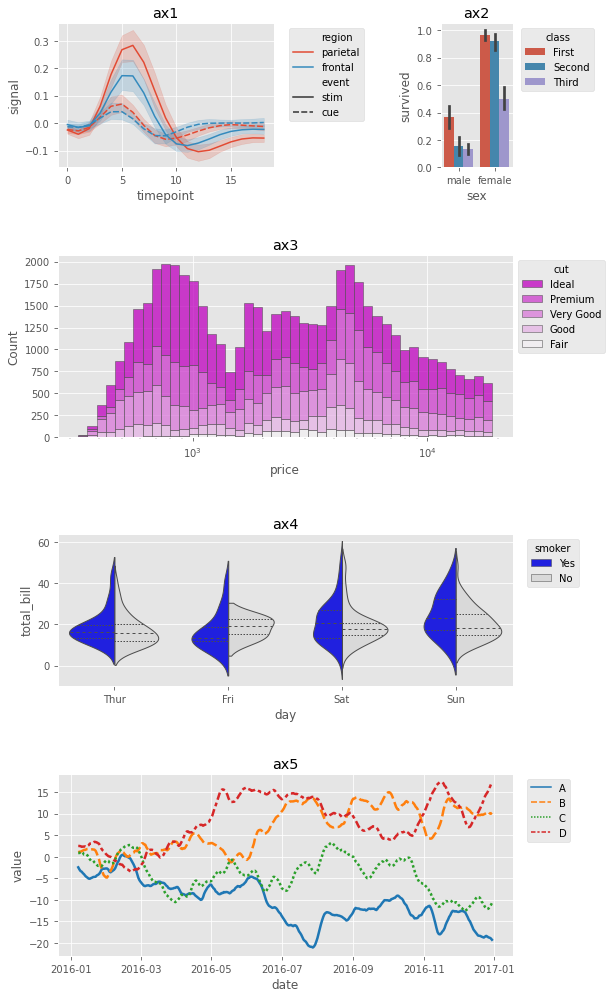

In [3]:
import pandas as pd
import seaborn as sns
import patchworklib as pw
import numpy as np

#ax1
ax1 = pw.Brick(figsize=(3,2))
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax1.set_title("ax1")

#ax2
ax2 = pw.Brick(figsize=(1,2))
titanic = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title("ax2")

#ax3
ax3 = pw.Brick(figsize=(5,2))
diamonds = sns.load_dataset("diamonds")
sns.histplot(diamonds, x="price", hue="cut", multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True, ax = ax3)
ax3.move_legend(new_loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title("ax3")

#ax4
ax4 = pw.Brick(figsize=(6,2))
tips = sns.load_dataset("tips")
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",split=True, inner="quart", linewidth=1, palette={"Yes": "b", "No": ".85"}, ax=ax4)
ax4.move_legend("upper left", bbox_to_anchor=(1.02, 1.0))
ax4.set_title("ax4")

#ax5
ax5    = pw.Brick(figsize=(5,2))
rs     = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates  = pd.date_range("1 1 2016", periods=365, freq="D")
data   = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_xlabel("date")
ax5.set_ylabel("value")
ax5.move_legend("upper left", bbox_to_anchor=(1.02, 1.0))
ax5.set_title("ax5")

#Combine
ax12345 = (ax1|ax2)/(ax3/ax4)/(ax5)
ax12345.savefig()

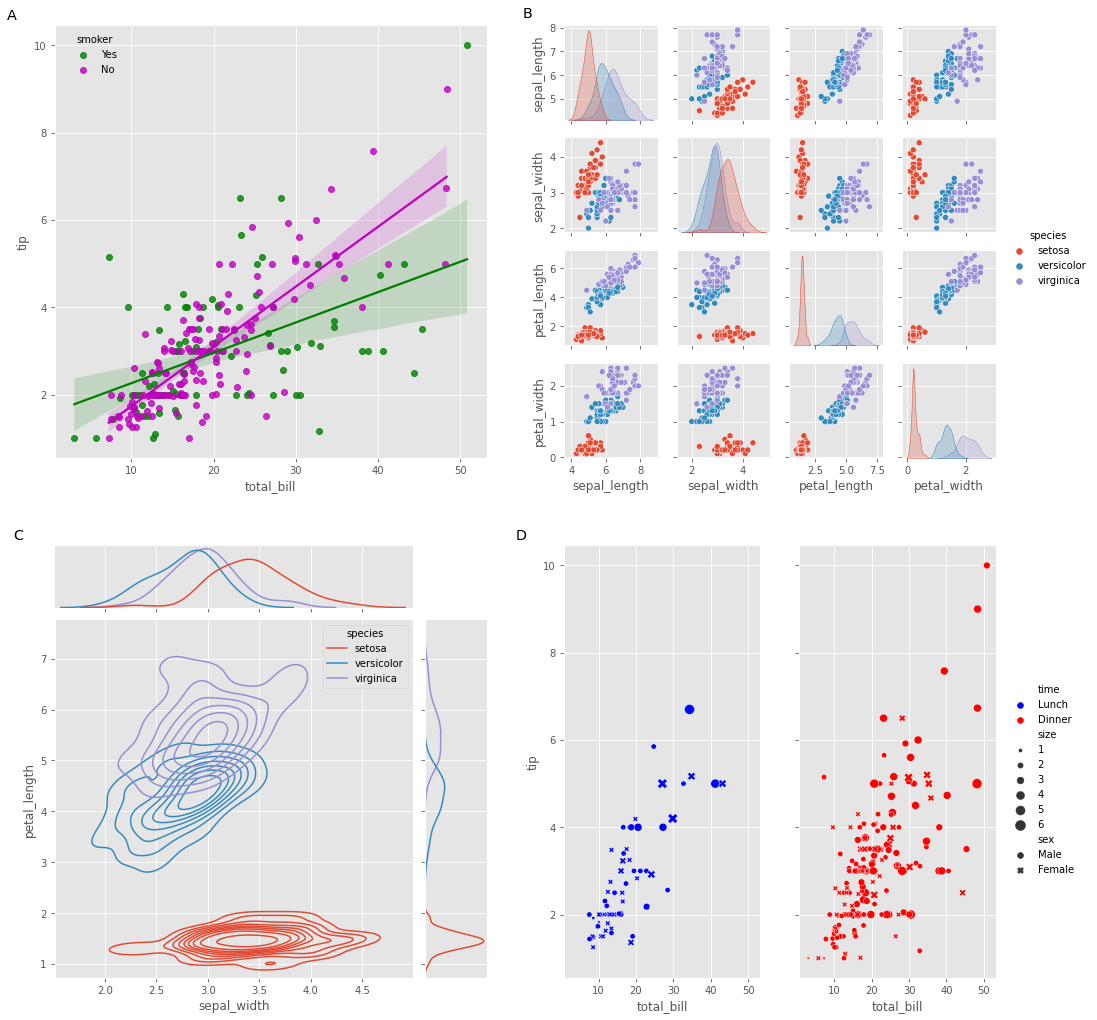

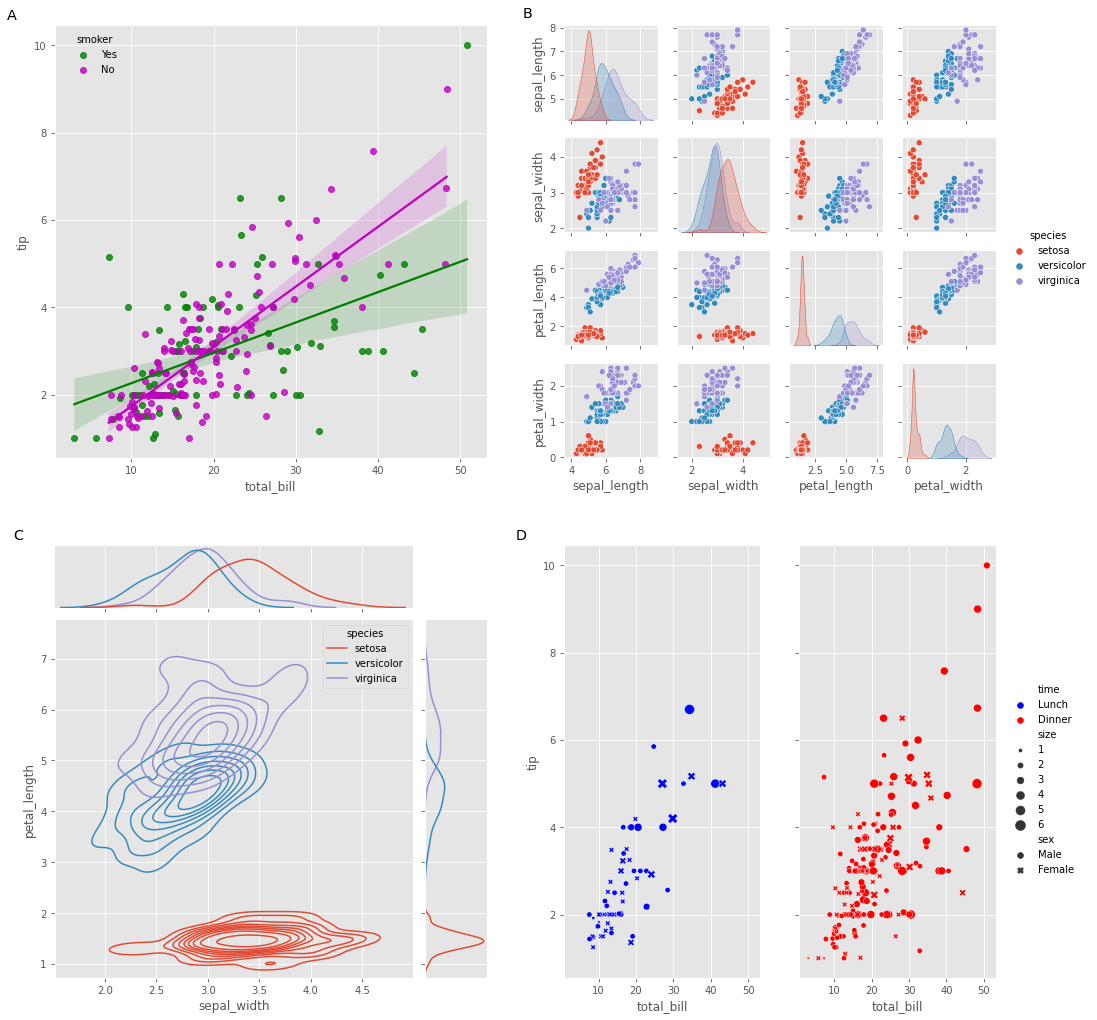

In [4]:
import matplotlib
import seaborn as sns
import patchworklib as pw 

pw.overwrite_axisgrid()

iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

# An lmplot
g0 = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, 
                palette=dict(Yes="g", No="m"))
g0 = pw.load_seaborngrid(g0, label="g0")

# A Pairplot
g1 = sns.pairplot(iris, hue="species")
g1 = pw.load_seaborngrid(g1, label="g1", figsize=(6,6))

# A relplot
g2 = sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="time", 
                 size="size", style="sex", palette=["b", "r"], sizes=(10, 100))
g2.set_titles("")
g2 = pw.load_seaborngrid(g2, label="g2")

# A JointGrid
g3 = sns.jointplot(x="sepal_width", y="petal_length", data=iris,hue="species",
                   kind="kde", space=0, color="g")

g3 = pw.load_seaborngrid(g3, label="g3", labels=["joint","marg_x","marg_y"])

#Format
g0.case.set_title('A', x=0, y=1.0, loc="right")
g0.move_legend("upper left", bbox_to_anchor=(0.1,1.0))
g1.case.set_title('B', x=0, y=1.0, loc="right")
g3.case.set_title('C', x=0, y=1.0, loc="right")
g2.case.set_title('D', x=0, y=1.0, loc="right")

#Combine
(((g0/g3)["g0"]|g1)["g1"]/g2).savefig()

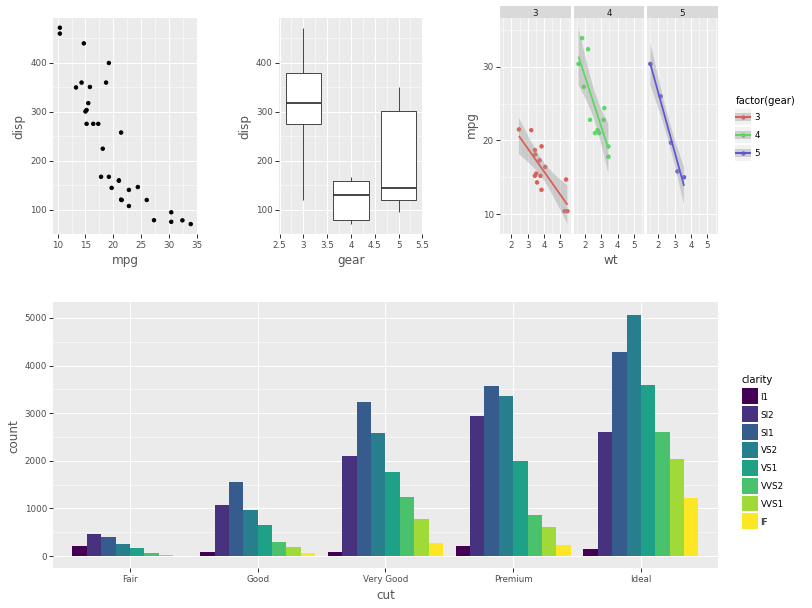

In [5]:
#!pip install plotnine
import patchworklib as pw
from plotnine import * 
from plotnine.data import *  

g1 = (ggplot(mtcars) + geom_point(aes("mpg", "disp"))) 
g1 = pw.load_ggplot(g1, figsize=(2,3))

g2 = (ggplot(mtcars) + geom_boxplot(aes("gear", "disp", group="gear"))) 
g2 = pw.load_ggplot(g2, figsize=(2,3))

g3 = (ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) + geom_point() + stat_smooth(method='lm') + facet_wrap('~gear')) 
g3 = pw.load_ggplot(g3, figsize=(3,3))

g4 = (ggplot(data=diamonds) + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge"))  
g4 = pw.load_ggplot(g4, figsize=(5,2))

#Combine
g1234 = (g1|g2|g3)/g4 
g1234.savefig()